In [1]:
import itertools
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_loan = pd.read_csv('loan_table.csv')
df_borrower = pd.read_csv('borrower_table.csv')


In [3]:
df_loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [4]:
df_borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [5]:
df_loan = df_borrower.merge(df_loan, on = 'loan_id', how = 'right')
df_loan

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN
5,423171,1,NaN,NaN,6100,0.53,6163,5298,1,29500,24,1,other,2012-11-07,1,1.0
6,568977,1,NaN,NaN,600,0.89,305,1456,0,0,50,2,emergency_funds,2012-10-12,0,NaN
7,200139,1,NaN,NaN,4000,0.57,602,2757,1,31700,36,8,business,2012-09-19,1,0.0
8,991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3,emergency_funds,2012-12-04,1,1.0
9,875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7,business,2012-01-20,1,1.0


In [6]:
df_loan['date'] = pd.to_datetime(df_loan['date'])

In [7]:
df_loan.rename(columns={'loan_purpose':'purpose',
                     'loan_granted':'granted',
                     'loan_repaid':'repaid',
                     'is_first_loan':'is_first',
                     'fully_repaid_previous_loans':'repay_prev',
                     'currently_repaying_other_loans':'paying_others',
                     'total_credit_card_limit':'credit_limit',
                     'avg_percentage_credit_card_limit_used_last_year':'credit_used',
                     'saving_amount':'saving',
                     'checking_amount':'checking',
                     'yearly_salary':'salary',
                     'dependent_number':'n_depends'}
            ,inplace=True)

In [8]:
df_loan.sample(5)

,loan_id,is_first,repay_prev,paying_others,credit_limit,credit_used,saving,checking,is_employed,salary,age,n_depends,purpose,date,granted,repaid
4344,793394,1,NaN,NaN,2700,0.99,1328,1265,0,0,35,1,other,2012-05-21,0,NaN
8422,226061,1,NaN,NaN,4300,0.83,2531,5624,1,34700,21,1,other,2012-03-20,1,1.0
3399,497012,1,NaN,NaN,0,NaN,682,2015,0,0,49,8,home,2012-05-16,0,NaN
39714,603865,0,1.0,1.0,5000,1.02,1133,2397,0,0,33,4,other,2012-11-20,0,NaN
21355,237584,1,NaN,NaN,4000,0.94,4970,2325,1,2300,24,2,emergency_funds,2012-05-08,1,1.0


In [9]:
def calc_profit_and_should_grant(row):
    """
    generate 'profit' and 'should_grant' target column according to rule:
    1. if not granted, profit=0, should_grant=0
    2. if granted and repaid, profit=1, should_grant=1
    3. if granted and not repaid, profit=-1, should_grant=0
    """
    profit = 0
    should_grant = 0
    
    granted = row['granted']
    repaid = row['repaid']
    
    if granted == 0:
        profit = 0
        should_grant = 0
    else:
        assert pd.notnull(repaid)
        profit = 1 if repaid == 1 else -1
        should_grant = 1 if repaid == 1 else 0
    
    return pd.Series({'profit': profit, 'should_grant': should_grant})  
    

In [10]:
profits = df_loan.apply(calc_profit_and_should_grant, axis = 1)

In [11]:
profits.sample(5)

,profit,should_grant
33298,0,0
49050,-1,0
96160,0,0
74064,1,1
51958,0,0


In [12]:
df_loan.sample(5)

,loan_id,is_first,repay_prev,paying_others,credit_limit,credit_used,saving,checking,is_employed,salary,age,n_depends,purpose,date,granted,repaid
35912,84278,0,1.0,0.0,2200,0.58,1341,4650,1,15000,63,5,business,2012-02-28,1,1.0
99159,156644,1,NaN,NaN,7900,0.22,767,5732,1,30000,25,3,home,2012-08-06,1,1.0
59425,624969,0,1.0,1.0,4000,0.49,1018,2367,0,0,46,5,home,2012-07-11,0,NaN
45099,898449,0,1.0,0.0,5100,0.72,153,6435,1,25500,28,8,home,2012-08-03,1,1.0
69132,22268,0,1.0,0.0,3300,1.05,959,1216,1,14600,42,8,investment,2012-04-13,0,NaN


In [13]:
df_loan = df_loan.join(profits)

In [14]:
df_loan.sample(5)

,loan_id,is_first,repay_prev,paying_others,credit_limit,credit_used,saving,checking,is_employed,salary,age,n_depends,purpose,date,granted,repaid,profit,should_grant
59432,477962,0,1.0,0.0,4800,0.64,2706,1837,1,35200,29,1,business,2012-09-05,1,1.0,1,1
60874,745223,0,1.0,0.0,3300,0.72,1374,3062,1,45800,37,1,other,2012-05-01,0,NaN,0,0
308,479148,0,0.0,1.0,6600,0.66,1141,4319,1,34500,62,2,home,2012-11-27,1,0.0,-1,0
64416,273767,1,NaN,NaN,7900,0.74,4635,3843,1,46000,45,8,home,2012-11-21,1,1.0,1,1
25775,511202,1,NaN,NaN,6800,0.66,1093,1099,1,48700,29,2,home,2012-01-04,1,1.0,1,1


In [15]:
X = df_loan.copy()
X.fillna({'repay_prev': -1, 'paying_others': -1}, inplace = True)
del X['is_first']

In [16]:
X.loc[X['is_employed'] == 0,'salary'].value_counts()

0    34508
Name: salary, dtype: int64

In [17]:
X.loc[X['salary'] == 0, 'is_employed'].value_counts()

0    34508
1       13
Name: is_employed, dtype: int64

In [18]:
X.loc[(X.salary == 0) & (X.is_employed == 1)]

,loan_id,repay_prev,paying_others,credit_limit,credit_used,saving,checking,is_employed,salary,age,n_depends,purpose,date,granted,repaid,profit,should_grant
5401,139144,-1.0,-1.0,2200,0.70,1807,2976,1,0,20,2,other,2012-10-17,1,0.0,-1,0
11308,632587,-1.0,-1.0,4300,0.77,1345,2056,1,0,28,3,other,2012-06-19,1,0.0,-1,0
11912,735733,-1.0,-1.0,0,NaN,1194,3869,1,0,38,8,other,2012-06-14,0,NaN,0,0
14856,155108,-1.0,-1.0,4800,0.69,3062,2220,1,0,31,1,investment,2012-10-02,1,1.0,1,1
20106,440144,1.0,0.0,6000,0.74,4320,9109,1,0,42,1,emergency_funds,2012-03-22,0,NaN,0,0
39705,263502,-1.0,-1.0,4600,0.93,1098,840,1,0,38,2,home,2012-08-29,0,NaN,0,0
42210,793669,-1.0,-1.0,9400,0.77,1552,5119,1,0,68,5,investment,2012-01-12,1,1.0,1,1
58898,657937,-1.0,-1.0,6500,0.43,271,4007,1,0,49,1,investment,2012-09-21,1,1.0,1,1
61416,566455,-1.0,-1.0,3400,1.04,1612,1804,1,0,37,1,emergency_funds,2012-06-15,0,NaN,0,0
68585,416825,1.0,0.0,5400,0.71,357,1737,1,0,69,1,business,2012-01-11,1,1.0,1,1


In [19]:
del X['is_employed']

In [20]:
X.purpose.value_counts()

home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: purpose, dtype: int64

In [21]:
X = pd.get_dummies(X)
X.sample(5)

,loan_id,repay_prev,paying_others,credit_limit,credit_used,saving,checking,salary,age,n_depends,date,granted,repaid,profit,should_grant,purpose_business,purpose_emergency_funds,purpose_home,purpose_investment,purpose_other
15854,547835,0.0,0.0,4500,0.58,4415,2748,37600,38,1,2012-07-19,1,1.0,1,1,0,0,1,0,0
83836,348283,1.0,0.0,3600,0.75,2507,6101,32200,64,1,2012-07-13,1,1.0,1,1,0,0,1,0,0
47237,725067,-1.0,-1.0,7400,1.04,301,6063,28700,45,1,2012-11-30,0,NaN,0,0,1,0,0,0,0
66163,871566,-1.0,-1.0,0,NaN,981,1683,7800,33,7,2012-10-12,0,NaN,0,0,1,0,0,0,0
91001,289210,1.0,0.0,3900,0.51,5895,6114,17900,55,1,2012-06-01,1,1.0,1,1,0,0,0,1,0


In [22]:
X.rename(columns = {'purpose_emergency_funds': 'purpose_emergency'}, inplace = True)

In [23]:
label = X.loc[:, 'should_grant']
feature_cols = ['repay_prev', 'paying_others', 'credit_limit', 'credit_used',
                 'saving', 'checking', 'salary', 'age', 'n_depends', 
                 'purpose_business','purpose_emergency', 'purpose_home', 'purpose_investment','purpose_other']
features = X[feature_cols]

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 14 columns):
repay_prev            101100 non-null float64
paying_others         101100 non-null float64
credit_limit          101100 non-null int64
credit_used           94128 non-null float64
saving                101100 non-null int64
checking              101100 non-null int64
salary                101100 non-null int64
age                   101100 non-null int64
n_depends             101100 non-null int64
purpose_business      101100 non-null uint8
purpose_emergency     101100 non-null uint8
purpose_home          101100 non-null uint8
purpose_investment    101100 non-null uint8
purpose_other         101100 non-null uint8
dtypes: float64(3), int64(6), uint8(5)
memory usage: 8.2 MB


In [25]:
label.value_counts()

0    70394
1    30706
Name: should_grant, dtype: int64

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features, label, test_size=0.3, random_state = 5)

In [27]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size = 0.3, random_state = 5)

In [28]:
train_matrix = xgb.DMatrix(Xtrain,ytrain)
valid_matrix = xgb.DMatrix(Xvalid,yvalid)
test_matrix = xgb.DMatrix(Xtest,ytest)

In [29]:
def train(params):
    params['silent'] = 1
    params['objective'] = 'binary:logistic'  # output probabilities
    params['eval_metric'] = 'auc'

    num_rounds = params["num_rounds"]
    early_stopping_rounds = params["early_stop_rounds"]

    # early stop will check on the last dataset
    watchlist = [(train_matrix, 'train'), (valid_matrix, 'validate')]
    bst = xgb.train(params, train_matrix, num_rounds, watchlist, early_stopping_rounds = early_stopping_rounds)

    print "parameters: {}".format(params)
    print "best {}: {:.2f}".format(params["eval_metric"], bst.best_score)
    print "best #trees: %d" % (bst.best_ntree_limit)

    return bst

In [30]:
# ------------- prepare parameters
params = {}
params["num_rounds"] = 300
params["early_stop_rounds"] = 30
# params['min_child_weight'] = 2
params['max_depth'] = 6
params['eta'] = 0.1
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

# ------------- train with xgboost
bst = train(params)



[0]	train-auc:0.879166	validate-auc:0.870448
Multiple eval metrics have been passed: 'validate-auc' will be used for early stopping.

Will train until validate-auc hasn't improved in 30 rounds.
[1]	train-auc:0.875608	validate-auc:0.868386
[2]	train-auc:0.885366	validate-auc:0.876686
[3]	train-auc:0.895323	validate-auc:0.886962
[4]	train-auc:0.897999	validate-auc:0.8894
[5]	train-auc:0.899247	validate-auc:0.890146
[6]	train-auc:0.900363	validate-auc:0.891109
[7]	train-auc:0.900294	validate-auc:0.891246
[8]	train-auc:0.90102	validate-auc:0.891403
[9]	train-auc:0.901402	validate-auc:0.891648
[10]	train-auc:0.902013	validate-auc:0.891776
[11]	train-auc:0.90245	validate-auc:0.891543
[12]	train-auc:0.902858	validate-auc:0.891616
[13]	train-auc:0.903262	validate-auc:0.891793
[14]	train-auc:0.903643	validate-auc:0.891624
[15]	train-auc:0.904308	validate-auc:0.891938
[16]	train-auc:0.904602	validate-auc:0.892204
[17]	train-auc:0.904798	validate-auc:0.892316
[18]	train-auc:0.905002	validate-auc:

In [31]:
yvalid_true = valid_matrix.get_label()
yvalid_pred_probas = bst.predict(valid_matrix, ntree_limit = bst.best_ntree_limit)

fpr,tpr,thresholds = roc_curve(yvalid_true, yvalid_pred_probas)
roc = pd.DataFrame({'FPR': fpr,'TPR': tpr,'Thresholds': thresholds})

In [32]:
def calc_profits(repaids, probas, threshold):
    total_profit = 0
    for (repaid, proba) in itertools.izip(repaids, probas):
        if proba > threshold:
            # it is possible for repaid = NaN
            # which means, my model grant loan to a borrower whose application was rejected under old model
            # the question doesn't clarify how to calculate profit for such case.
            # however, since most 'rejected borrowers' were considered unlikely to repay by old model
            # so I also think such people are very unlikely to repay even were granted
            # so their profit are also -1, the same as 'granted but unable to repay'
            total_profit += (1 if repaid == 1 else -1)
    return total_profit



In [33]:
# all examples in validation sets
loan_valid = df_loan.loc[yvalid.index,:]

# calculate profits under each candidate cutoff
valid_profits = [calc_profits(loan_valid.repaid, yvalid_pred_probas, threshold) for threshold in roc.Thresholds]

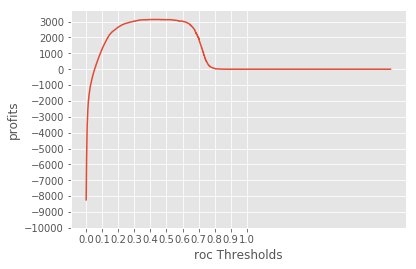

In [34]:
plt.plot(roc.Thresholds, valid_profits)
plt.xlabel('roc Thresholds')
plt.ylabel('profits')
plt.yticks(xrange(-10000,4000,1000))
_ = plt.xticks(np.linspace(0,1,11))
plt.rc('figure',figsize=(10,5))

In [35]:
valid_threshold_profits = pd.DataFrame({'threshold':roc.Thresholds,'profit':valid_profits})
temp = valid_threshold_profits.loc[valid_threshold_profits.profit.argmax(),:]
temp

profit       3142.00000
threshold       0.42277
Name: 3406, dtype: float64

In [36]:
proba_threshold = temp['threshold']
proba_threshold

0.42276960611343384

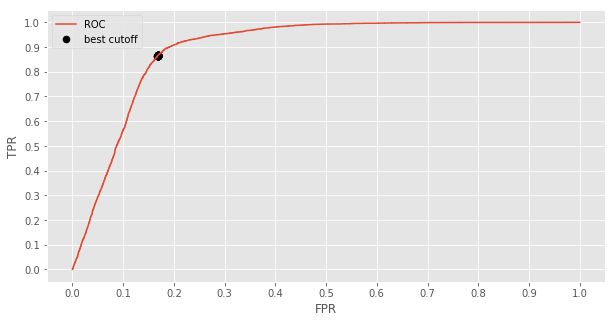

In [37]:
# plot ROC
plt.plot(roc.FPR,roc.TPR,label='ROC')
plt.xlabel("FPR")
plt.ylabel('TPR')

ticks = np.linspace(0,1,11)
plt.yticks(ticks)
plt.xticks(ticks)

# plot best thresholds
best_cutoffs = roc.loc[ (roc.Thresholds > 0.42) & (roc.Thresholds < 0.43),:]
plt.scatter(best_cutoffs.FPR, best_cutoffs.TPR, c='k', s=50, label='best cutoff')

plt.rc('figure',figsize=(10,5))
plt.legend(loc='best')


In [38]:
ytest_pred_probas = bst.predict(test_matrix, ntree_limit = bst.best_ntree_limit)
ytest_pred = (ytest_pred_probas > proba_threshold).astype(int)

In [39]:
ytest_pred_probas

array([ 0.02149568,  0.00490387,  0.0098929 , ...,  0.02100166,
        0.00170113,  0.74453545], dtype=float32)

In [40]:
print "test accuracy: ",accuracy_score(ytest,ytest_pred)

test accuracy:  0.839762611276


In [41]:
print classification_report(ytest, ytest_pred)

             precision    recall  f1-score   support

          0       0.93      0.83      0.88     21153
          1       0.69      0.87      0.77      9177

avg / total       0.86      0.84      0.84     30330



In [42]:
# profit under old model
loan_test = df_loan.loc[ytest.index,:]
old_profit = loan_test.profit.sum()
old_profit

4123

In [43]:
# profit under new model
new_profit = calc_profits(loan_test.repaid, ytest_pred_probas, proba_threshold)
new_profit

4317

In [44]:
len(ytest_pred_probas)

30330

In [45]:
len(loan_test.repaid)

30330

In [46]:
loan_test.repaid

50225    0.0
18550    0.0
82951    NaN
47131    1.0
98728    0.0
77025    1.0
32453    NaN
56679    0.0
38164    NaN
62521    0.0
76845    1.0
66945    NaN
95207    NaN
45517    1.0
44228    NaN
22164    0.0
9843     1.0
70089    1.0
26407    1.0
65765    0.0
64273    1.0
90612    1.0
34358    NaN
24427    NaN
42001    NaN
94504    1.0
42393    NaN
64164    NaN
56069    1.0
60864    NaN
        ... 
7662     NaN
54171    NaN
74633    1.0
62991    NaN
86793    NaN
98695    0.0
6757     1.0
83845    NaN
40712    NaN
7307     NaN
89867    NaN
54139    NaN
4121     0.0
35205    NaN
83392    NaN
71536    NaN
40399    NaN
49037    NaN
93637    0.0
51303    NaN
34936    1.0
17656    1.0
6280     1.0
260      NaN
21145    1.0
5227     0.0
15944    1.0
92905    NaN
9790     NaN
38522    NaN
Name: repaid, Length: 30330, dtype: float64

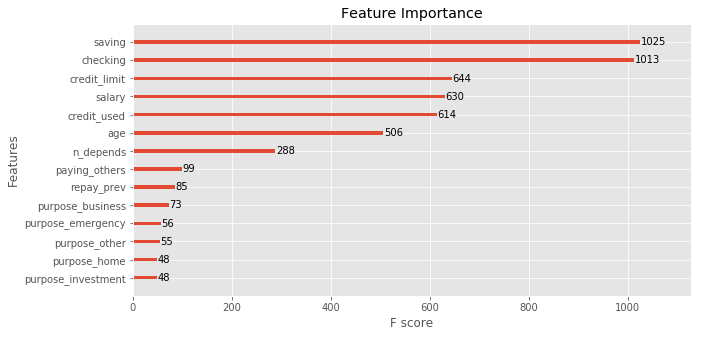

In [47]:
xgb.plot_importance(bst,title='Feature Importance')

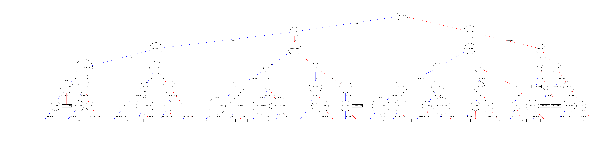

In [48]:
xgb.plot_tree(bst, num_trees=2)

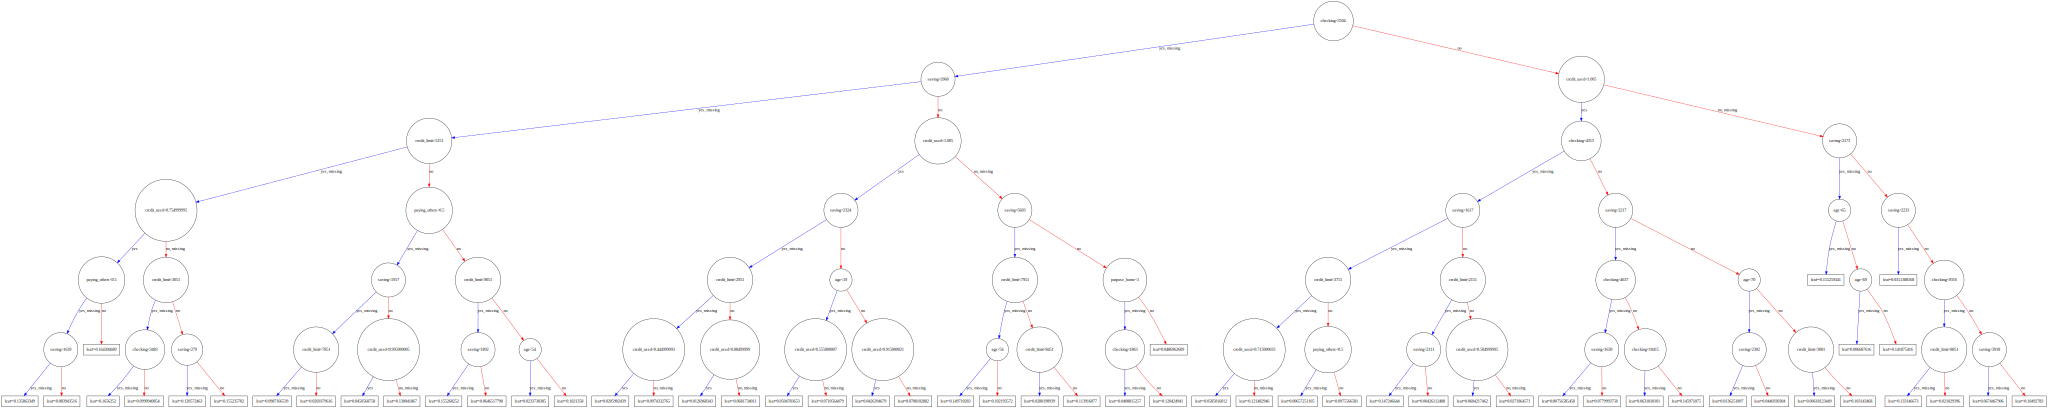

In [49]:
xgb.to_graphviz(bst, num_trees=2)